In [1]:
! pip install fuzzywuzzy

jupyter-console 5.2.0 requires ipykernel, which is not installed.
notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.


In [2]:
! pip install graphics
#! pip install --upgrade pip

  Could not find a version that satisfies the requirement graphics (from versions: )
No matching distribution found for graphics


In [2]:
import numpy as np
import pandas as pd
import scipy
import datetime
import random
#import graphics
#from graphics import color_rgb
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

import fuzzywuzzy
from fuzzywuzzy import process
import chardet

import warnings
warnings.filterwarnings('ignore')

C:\Users\hannah\Anaconda2\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 16
sb.set_style('whitegrid')

In [4]:
address = 'C:/Users/hannah/Documents/our life together/our-tent-is-the-best-tent_2018-05-14_export.csv'
expenses = pd.read_csv(address)#, index_col = 'Date', parse_dates = True)
print expenses.isnull().sum()

expenses_nonull = expenses.dropna( )
expenses_nonull.head()
print expenses_nonull.isnull().sum()
expenses_nonull.sample(5)

Date             2
Description      2
Category         2
Cost             2
Currency         2
Hannah           2
Dheeraj Golla    2
dtype: int64
Date             0
Description      0
Category         0
Cost             0
Currency         0
Hannah           0
Dheeraj Golla    0
dtype: int64


,Date,Description,Category,Cost,Currency,Hannah,Dheeraj Golla
1097,2/2/2018,Ace hardware,Household supplies,36.74,USD,18.37,-18.37
483,9/26/2016,Sprouts,Groceries,49.71,USD,24.85,-24.85
122,1/31/2016,guadalajara grill,Dining out,42.85,USD,21.42,-21.42
1148,3/22/2018,H mart,Groceries,36.71,USD,18.35,-18.35
459,9/12/2016,Safeway,Groceries,56.6,USD,28.30,-28.30


In [5]:
print expenses_nonull['Date'].head()

expenses_nonull['parsed date'] = pd.to_datetime(expenses_nonull['Date'], format = "%m/%d/%Y")
#expenses_nonull['parsed date'].head()

1    7/9/2015
2    7/9/2015
3    7/9/2015
4    7/9/2015
5    7/9/2015
Name: Date, dtype: object


In [6]:
expenses_nonull = expenses_nonull[expenses_nonull.Cost != ' ']
expenses_nonull['Cost'] = expenses_nonull.Cost.astype(float)
expenses_nonull['Cost'].head()

1    66.00
2    10.20
3    30.49
4    80.00
5    16.00
Name: Cost, dtype: float64

In [7]:
print expenses_nonull['Category'].unique()
cat_dict = {
    "Gas/fuel": "Gas/fuel",
    "Dining out" : "Dining out",
    "Other": "General",
    "Travel": "Travel",
    "Hotel": "Travel",
    "Sports": "Sports",
    "Bus/train": "Travel",
    "Bicycle": "Sports",
    "Music": "Entertainment",
    "Groceries": "Groceries",
    "Taxi": "Travel",
    "TV/Phone/Internet":"Internet",
    "Liquor":"Liquor",
    "Clothing":"Clothing",
    "General":"General",
    "Maintenance":"Maintenance",
    "Household supplies":"Household supplies",
    "Games":"Entertainment",
    "Movies":"Entertainment",
    "Pets": "Pets",
    "Services":"Maintenance",
    "Plane": "Travel",
    "Furniture": "Household supplies",
    "Rent": "Rent",
    "Electronics": "Entertainment",
    "Electricity": "Electricity",
    "Car": "Maintenance",
    "Insurance":"Insurance",
    "Heat/gas":"Heat/gas",
    "Parking":"Travel",
    "Trash": "Compost",
    "Cleaning": "Maintenance",
    "Gifts":"General",
    "Payment":"General",
    " ":"General",
    np.nan:"General"
}
expenses_nonull['Category'] = expenses_nonull['Category'].map(cat_dict)
print expenses_nonull['Category'].unique()
#expenses_nonull.loc[expenses_nonull['Category'] == 'Travel']

['Gas/fuel' 'Dining out' 'Other' 'Hotel' 'Sports' 'Bus/train' 'Bicycle'
 'Music' 'Groceries' 'Taxi' 'TV/Phone/Internet' 'Liquor' 'Clothing'
 'General' 'Maintenance' 'Household supplies' 'Games' 'Movies' 'Pets'
 'Services' 'Plane' 'Furniture' 'Rent' 'Electronics' 'Electricity' 'Car'
 'Insurance' 'Heat/gas' 'Parking' 'Trash' 'Cleaning' 'Gifts' 'Payment']
['Gas/fuel' 'Dining out' 'General' 'Travel' 'Sports' 'Entertainment'
 'Groceries' 'Internet' 'Liquor' 'Clothing' 'Maintenance'
 'Household supplies' 'Pets' 'Rent' 'Electricity' 'Insurance' 'Heat/gas'
 'Compost']


In [56]:
#expenses_2018 = pd.DataFrame(expenses_nonull[expenses_nonull['parsed date'].dt.year == 2018], index= expenses_nonull.Date.yr)
expenses_2017 = expenses_nonull[expenses_nonull['parsed date'].dt.year == 2017]
expenses_2016 = expenses_nonull[expenses_nonull['parsed date'].dt.year == 2016]
expenses_2018 = expenses_nonull[expenses_nonull['parsed date'].dt.year == 2018]

#print expenses_nonull['Category']
#expenses_2018 = expenses_2018.dropna()
#expenses_2018.head()
#expenses_2018_2 = pd.DataFrame(expenses_2018['Category'] == 'Travel', index = expenses_2018['Date'])
#expenses_2018_2.head()
#expenses_2018.sample(20)

In [51]:
sb.barplot??

In [58]:
groceries_2018 = expenses_2018[expenses_2018['Category'] == 'Groceries']
groceries_2018['Month'] = groceries_2018['parsed date'].dt.month
#groceries_2017.head()
#x = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
y = groceries_2018.groupby(groceries_2018['Month']).Cost.sum()
sb.barplot(x, y)

KeyError: 'Jan'

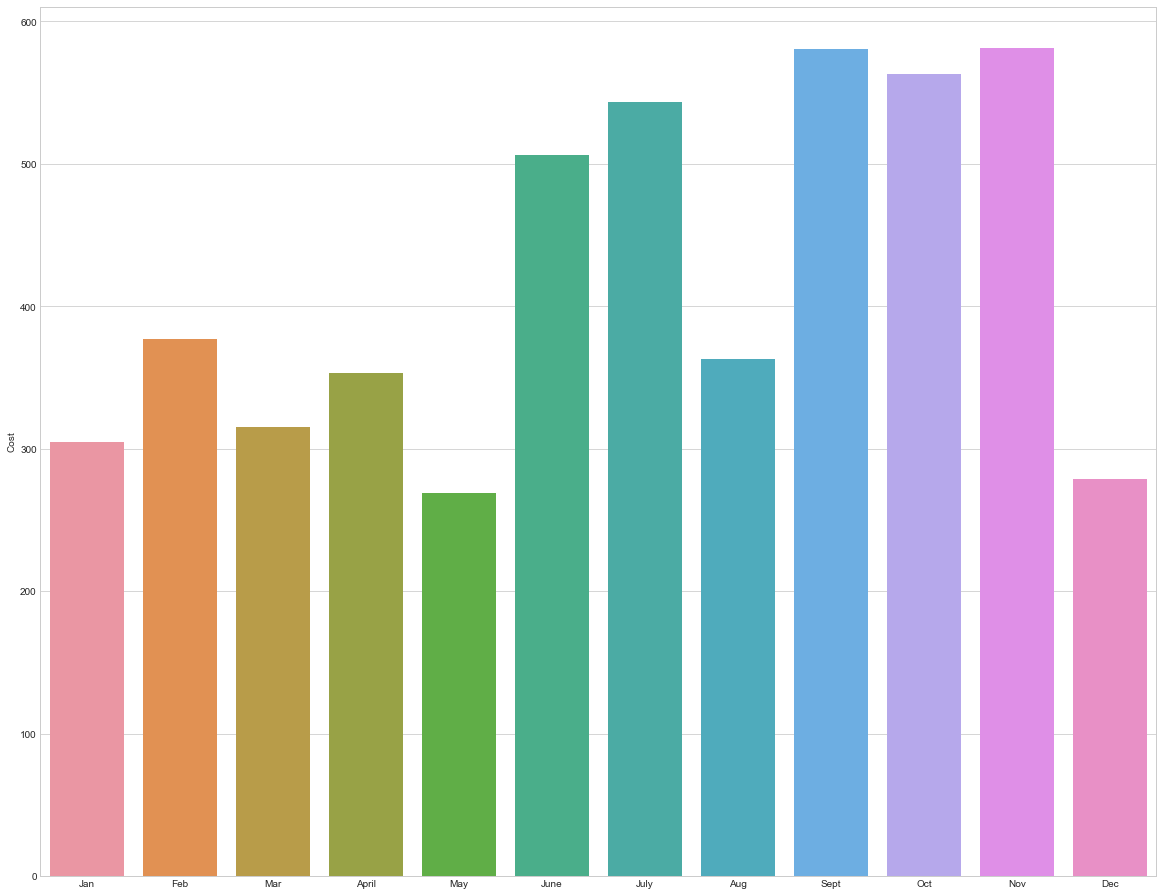

In [54]:
groceries_2016 = expenses_2016[expenses_2016['Category'] == 'Groceries']
groceries_2016['Month'] = groceries_2016['parsed date'].dt.month
#groceries_2017.head()
x = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
y = groceries_2016.groupby(groceries_2016['Month']).Cost.sum()
sb.barplot(x, y)

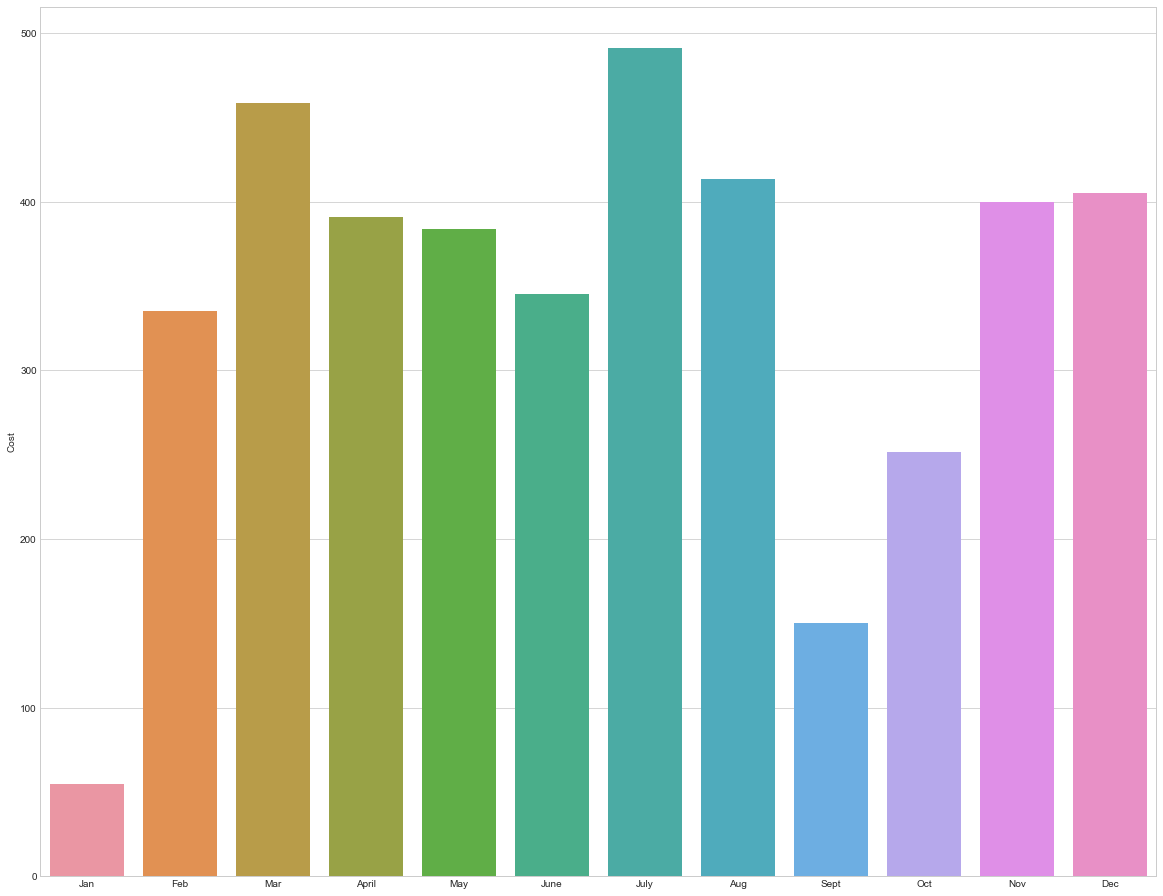

In [53]:
groceries_2017 = expenses_2017[expenses_2017['Category'] == 'Groceries']
groceries_2017['Month'] = groceries_2017['parsed date'].dt.month
#groceries_2017.head()
x = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
y = groceries_2017.groupby(groceries_2017['Month']).Cost.sum()
sb.barplot(x, y)

In [11]:
#print expenses_2017.groupby(expenses_2017['Category'])['Cost'].sum()
#print expenses_2016.groupby(expenses_2016['Category'])['Cost'].sum()
#print expenses_2018.groupby(expenses_2018['Category'])['Cost'].sum()

Category
Clothing                20.00
Compost                 68.00
Dining out            3207.92
Electricity            756.24
Entertainment          732.09
Gas/fuel               748.69
General                553.03
Groceries             4079.53
Heat/gas               510.33
Household supplies     586.73
Liquor                1390.13
Maintenance            171.35
Sports                 332.38
Travel                 824.69
Name: Cost, dtype: float64
Category
Clothing                32.42
Compost                 27.00
Dining out            4245.19
Electricity            768.60
Entertainment         1089.82
Gas/fuel               563.52
General                864.45
Groceries             5035.70
Heat/gas               167.95
Household supplies     541.27
Insurance               57.90
Internet               195.18
Liquor                1964.26
Maintenance            315.98
Pets                    54.39
Rent                  1400.00
Sports                 640.76
Travel                163

In [16]:
plt.pie??


['Clothing' 'Compost' 'Dining out' 'Electricity' 'Entertainment'
 'Gas/fuel' 'General' 'Groceries' 'Heat/gas' 'Household supplies'
 'Insurance' 'Internet' 'Liquor' 'Maintenance' 'Pets' 'Rent' 'Sports'
 'Travel']
Category
Clothing                           32.42
Compost                             27.0
Dining out                       4245.19
Electricity                        768.6
Entertainment         1089.8200000000002
Gas/fuel               563.5199999999999
General                864.4499999999999
Groceries              5035.699999999998
Heat/gas                          167.95
Household supplies                541.27
Insurance                           57.9
Internet                          195.18
Liquor                1964.2600000000002
Maintenance                       315.98
Pets                               54.39
Rent                              1400.0
Sports                            640.76
Travel                1635.1699999999998
Name: Cost, dtype: object


Text(0.5,1,u'2016 Expenses')

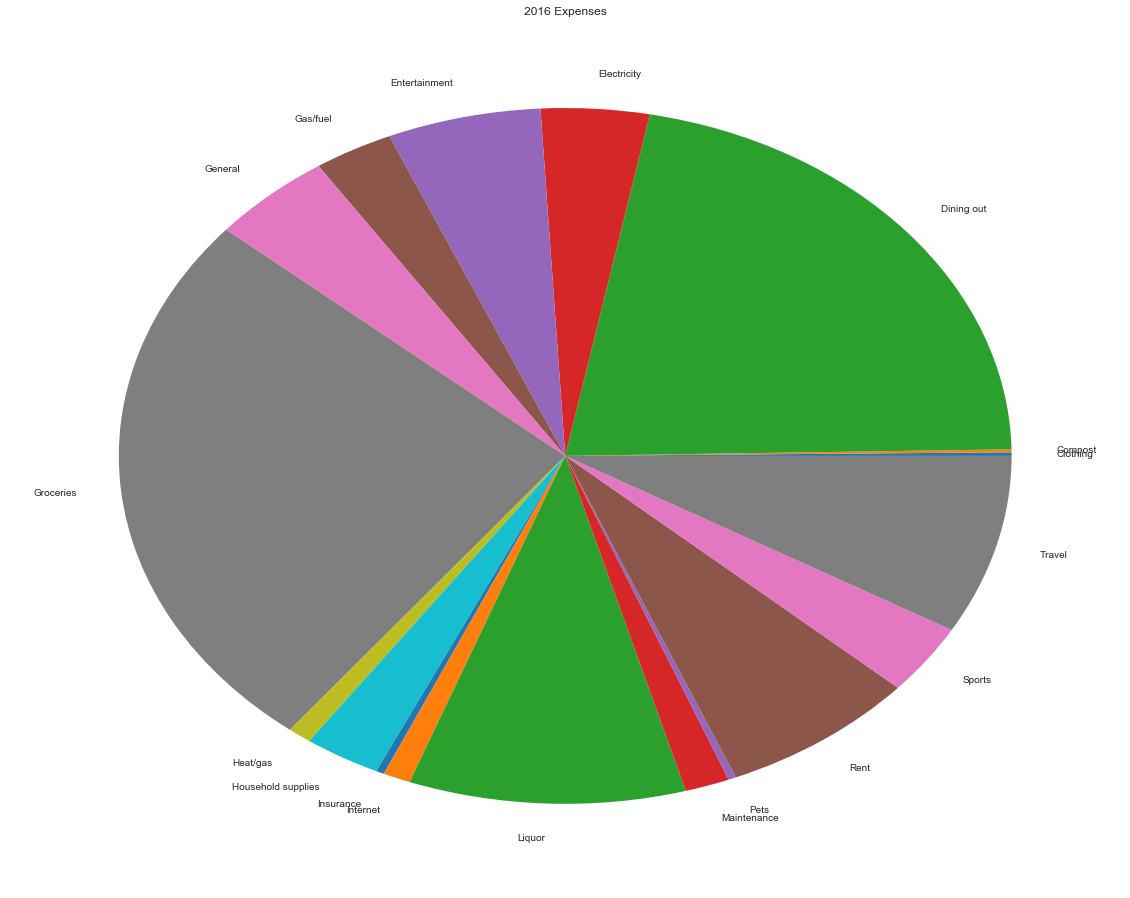

In [36]:
plt.figure(0)
labels_2016 = expenses_2016.groupby(expenses_2016['Category'])['Cost']
labels_names_2016 = expenses_2016['Category'].unique()
labels_names_2016.sort()
print labels_names_2016
labels_values = expenses_2016.groupby(expenses_2016['Category'])['Cost'].sum()
print labels_values.astype(str)
#labels = labels_names_2016 + labels_values
#print labels
#color_theme_2016 = list()
#rgb_2016 = random.uniform(0,1)
#for item in labels_names_2016:
    #rgb_2016 += .1
    #if rgb_2016 > 1:
        #rgb_2016 -= 1
    #color = (rgb_2016,rgb_2016,rgb_2016)
    #color_theme_2016.append(color)
#print len(color_theme_2016), len(labels_2016), len(labels_names_2016)
plt.pie(labels_2016.sum(), labels = labels_names_2016)
plt.title('2016 Expenses')


#plt.figure(1)
#labels = expenses_2017.groupby(expenses_2017['Category'])['Cost']
#labels_names = year['Category'].unique()
#labels_names.sort()
#color_theme = list()
#rgb = 0.0
#for item in labels_names:
#    rgb += .02
#    color = (rgb,rgb,rgb)
#    color_theme.append(color)
#print len(color_theme), len(labels_names), len(labels.sum())
#plt.pie(labels.sum(), labels = labels_names, colors = color_theme)
#plt.title('2017 Expenses')


#plt.figure(2)
#labels = expenses_2018.groupby(expenses_2018['Category'])['Cost']
#labels_names = year['Category'].unique()
##labels_names.sort()
#color_theme = list()
##rgb = 0.0
#for item in labels_names:
#    rgb += .02
#    color = (rgb,rgb,rgb)
#    color_theme.append(color)
#plt.pie(labels.sum(), labels = labels_names, colors = color_theme)
#plt.title(str(expenses_2018))

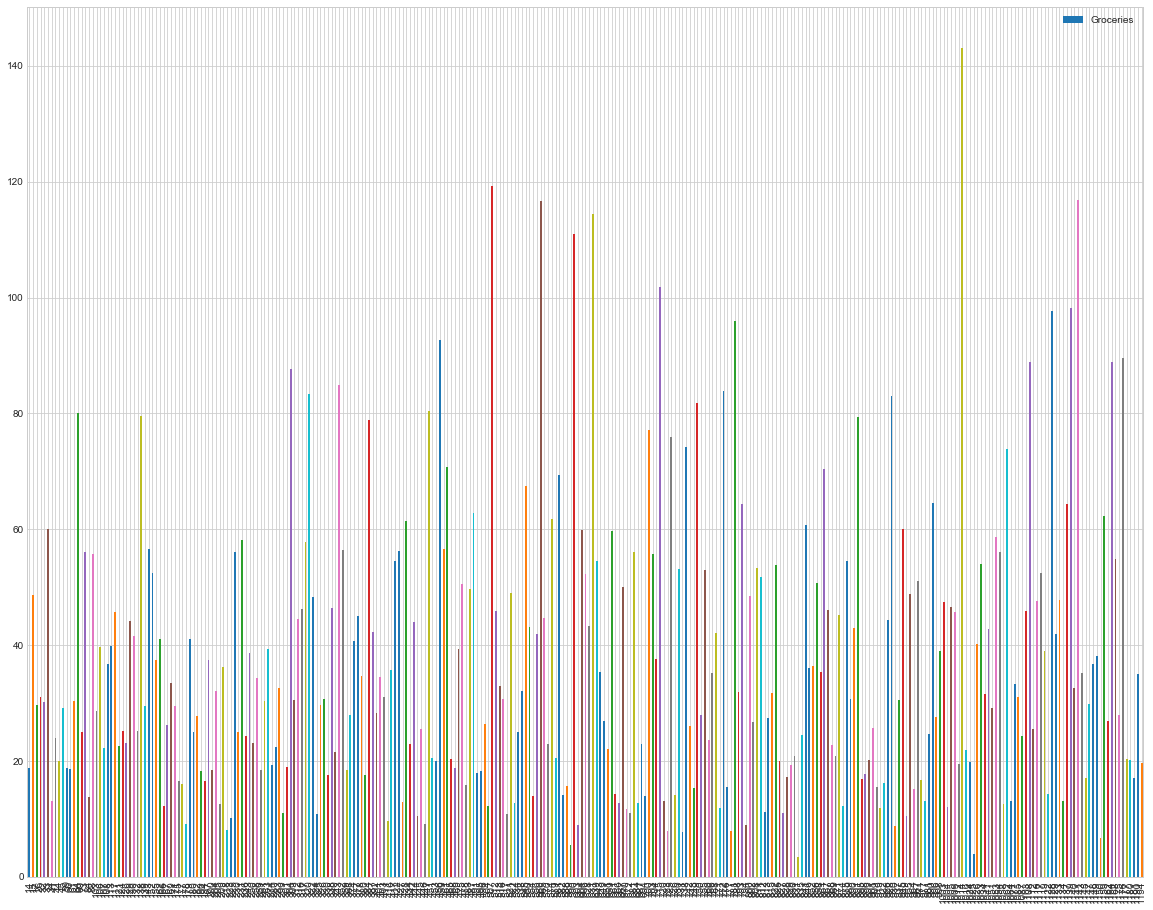

In [37]:
#print expenses_2017.groupby(expenses_2017['Category'])['Cost'].sum()
#print expenses_2016.groupby(expenses_2016['Category'])['Cost'].sum()
#print type(expenses_2018.groupby(expenses_2018['Category'])['Cost'].sum())
#expenses_2017.head()
#expenses_nonull.head()
#yearly_expenses = pd.DataFrame(expenses_2017.groupby(expenses_nonull['Category'])['Cost'].sum())
#yearly_expenses['year'] = 2017
#yearly_expenses.head()
#expenses_nonull.plot()
#expenses_nonull.Cost[expenses_nonull['Category'] == 'Gas/fuel'].plot(label = 'Gas', legend = True)
expenses_nonull.Cost[expenses_nonull['Category'] == 'Groceries'].plot(label = 'Groceries', legend = True, kind = 'bar')
#expenses_nonull.Cost[expenses_nonull['Category'] == 'Travel'].plot(label = 'Travel', legend = True)

In [ ]:
travel = expenses_nonull[expenses_nonull['Category'] =='Travel']
#travel

In [24]:
print(travel['Cost'].max())
print travel.Description[travel['Cost'] == travel['Cost'].max()].item()
print travel.Cost[travel['Cost'] == travel['Cost'].max()].item()
#print travel.[travel['Cost'] == travel['Cost'].max()].item()
print travel.loc[travel['Cost'] == travel['Cost'].max()]
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
travel['Cost'].plot()
ax.annotate(travel.Description[travel['Cost'] == travel['Cost'].max()].item(), xy=(2, 647), xytext = (2018, 647),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_title('Travel Expenditures')

NameError: name 'travel' is not defined

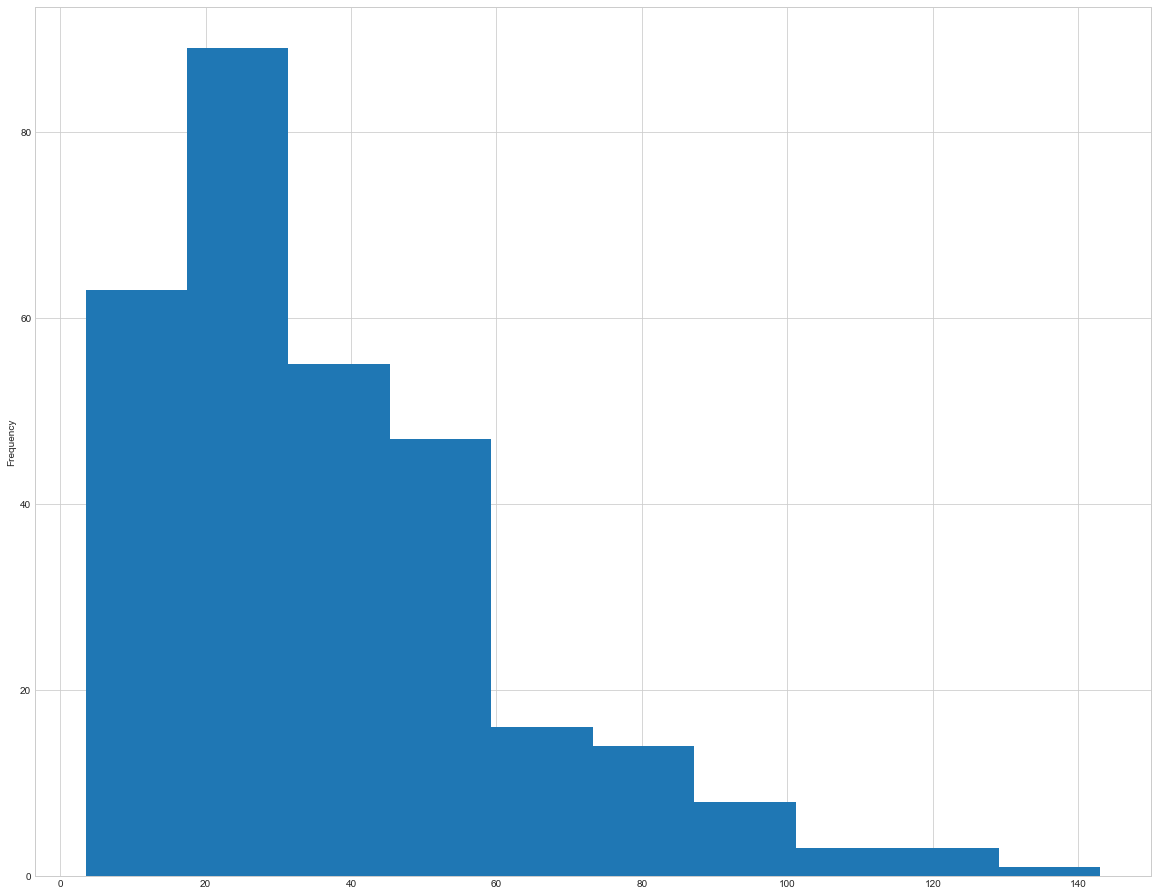

In [25]:
groceries = expenses_nonull[expenses_nonull['Category'] == 'Groceries']
groceries.Cost.plot('hist')